<a href="https://colab.research.google.com/github/Jeetesh1512/learnML/blob/main/MLJovian1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x79a314711280>)

In [6]:
!pip install pandas --quiet

In [7]:
import pandas as pd

In [8]:
medical_df = pd.read_csv('medical.csv')

In [10]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
!pip install plotly matplotlib seaborn --quiet

In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [16]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [24]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [27]:
#bmi
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['blue'],
                   title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [28]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [29]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
px.histogram(medical_df, x='smoker',color='sex', title='Smokers')

In [35]:
#relationship b/w age and charges using scatterplot
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.show()

In [36]:
#bmi vs charges
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.show()

In [38]:
px.violin(medical_df, x='children', y='charges')

In [39]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [40]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [41]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

Need numeric data for correlation. So, we can't use it directly for smokers.

In [44]:
smoker_values = {'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [43]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

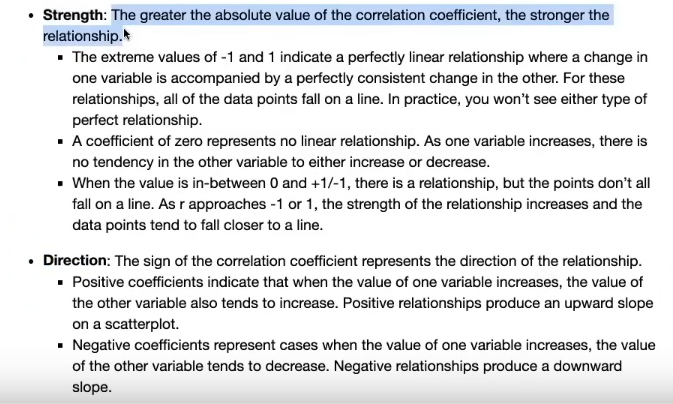

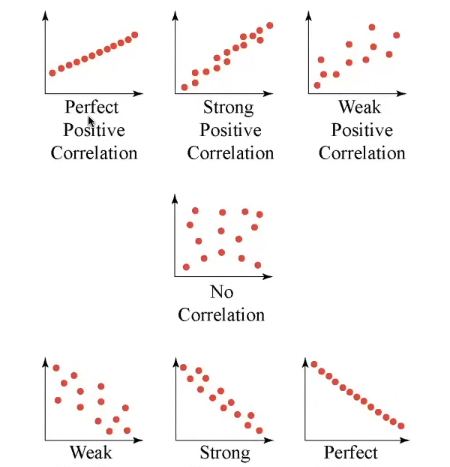

In [47]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Map')

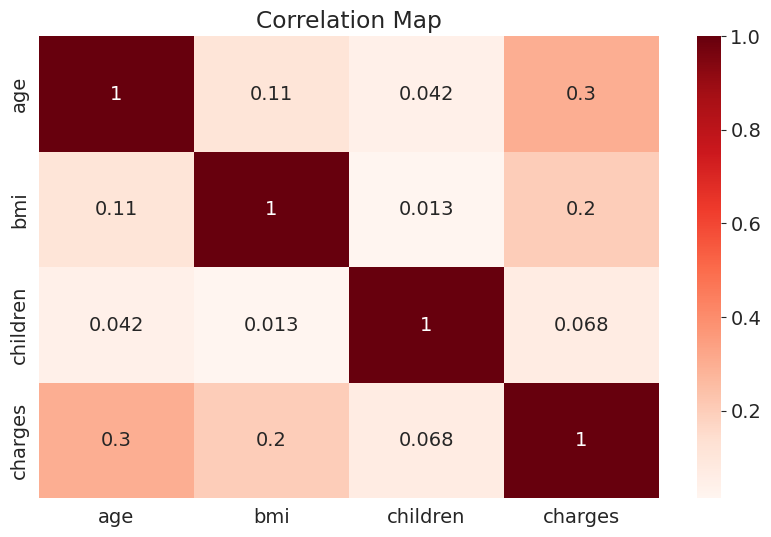

In [48]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Map')

Linear Regression using a single feature.

Smoker and age columns have the strongest correlation with charges. We need to find a way of estimating the value of 'charges' using the value of age for non-smokers. First, let's create a data frame containing just data for non smokers

In [49]:
non_smoker_df = medical_df[medical_df.smoker=='no']

Visualization of relationship b/w 'age' and 'charges'

<Axes: title={'center': 'Age v/s Charges'}, xlabel='age', ylabel='charges'>

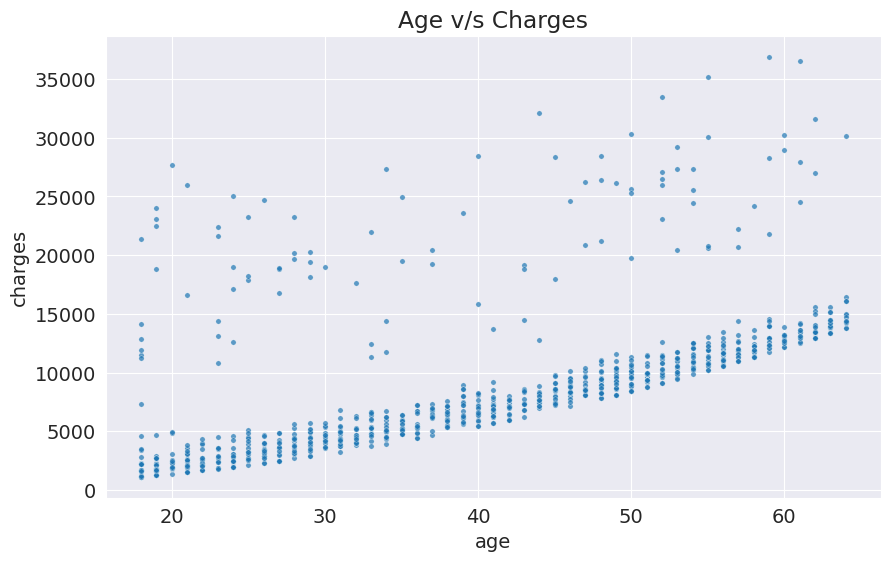

In [50]:
plt.title('Age v/s Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

y = wx+b

=> charges = w x age + b

w -> weight
b -> bias

This technique is called linear regression

Values in the 'age' column are called as "inputs" and the values in the 'charges' column are called as "targets"


We are creating a helper function to compute charges

In [51]:
def estimate_charges(age,w,b):
  return w*age+b

In [90]:
w=280
b=-3500

In [91]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

,age
1,1540
2,4340
3,5740
4,5460
5,5180
...,...
1332,11060
1333,10500
1334,1540
1335,1540


In [55]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Text(0, 0.5, 'Estimated Charges')

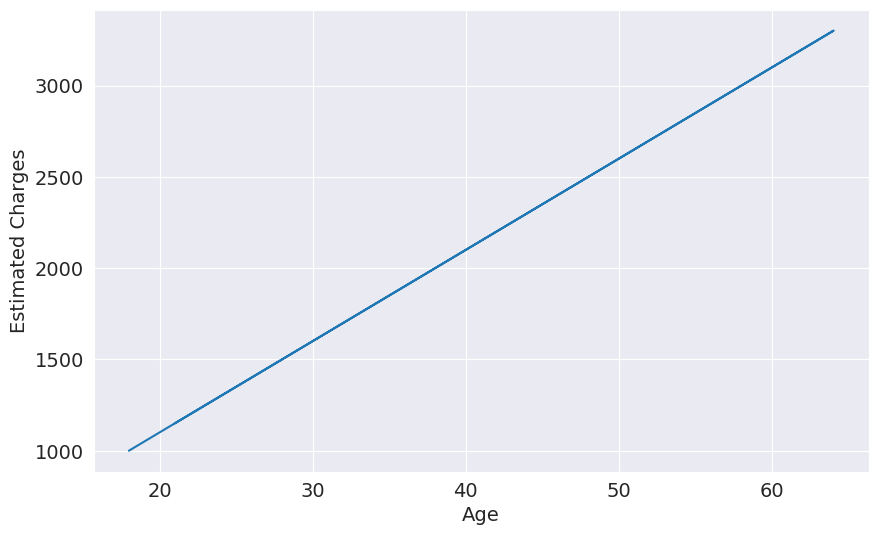

In [59]:
plt.plot(ages,estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

This is not close to the actual data

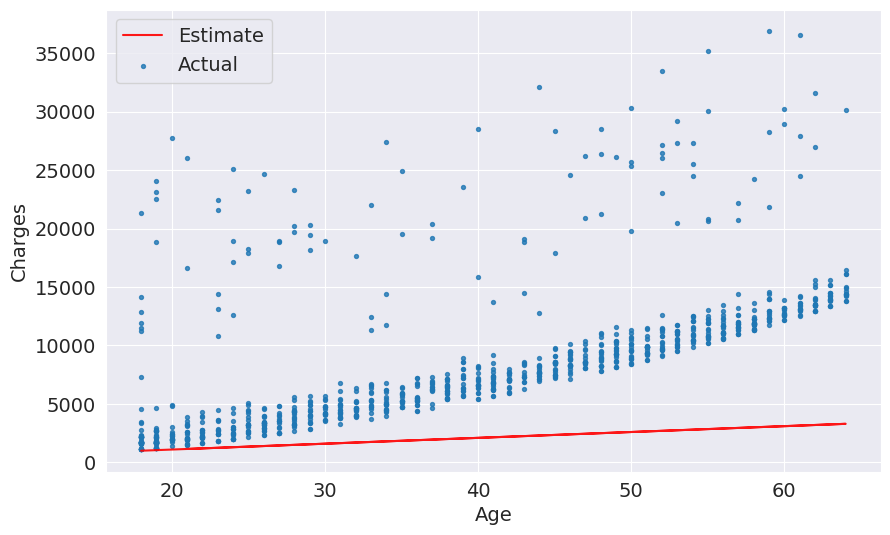

In [61]:
target = non_smoker_df.charges

plt.plot(ages,estimated_charges,'r', alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

This shows poor estimates. We can try different values for w and b to for that we can use a helper function

In [65]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r', alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

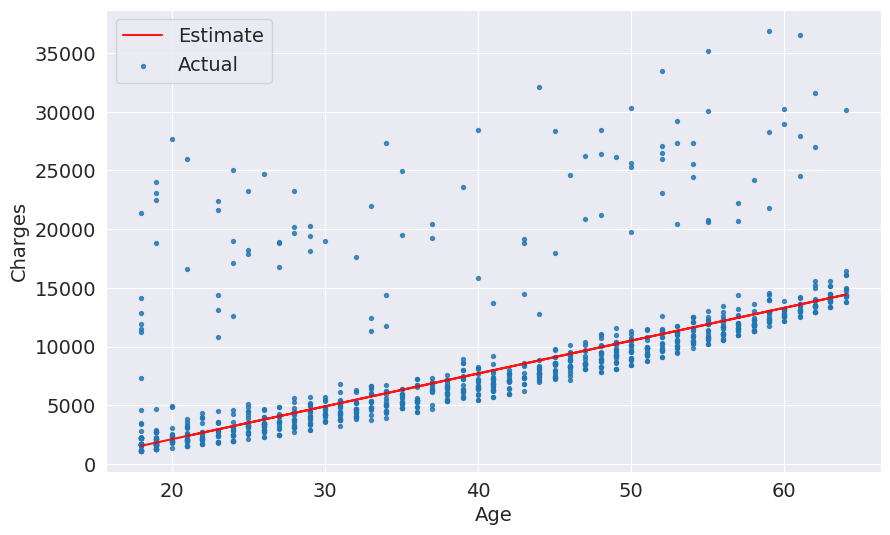

In [86]:
try_parameters(280,-3500)

Instead of testing on our own with different values, we can instead use the computer to try different values for w and b and learn the relationship between "age" and "charges".

To do this, we need to:

1) Measure numerically how well the line fits the points.
2) Once the "measure of fit" has been computed, we need a way to modify w and b to improve the fit.

In [88]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [92]:
predictions = estimated_charges
predictions

,age
1,1540
2,4340
3,5740
4,5460
5,5180
...,...
1332,11060
1333,10500
1334,1540
1335,1540


In [93]:
import numpy as np

In [94]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [95]:
w=50
b=100

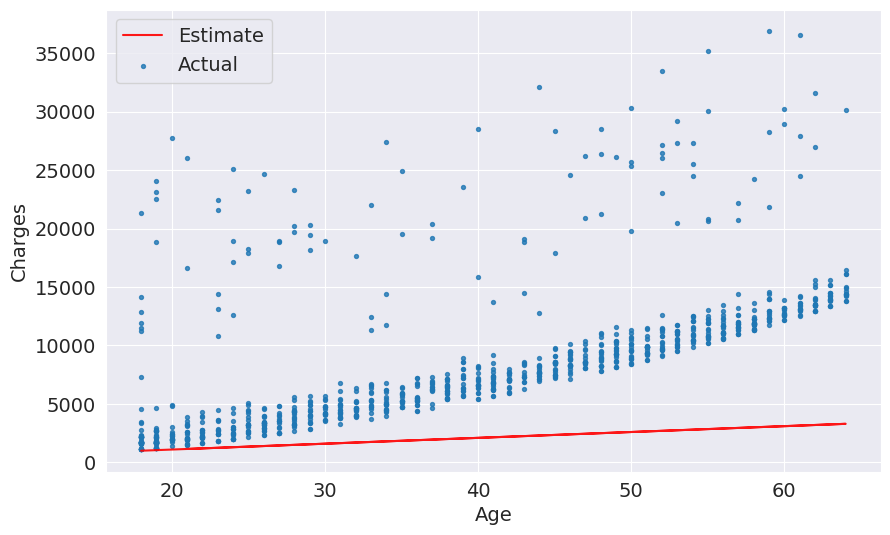

In [96]:
try_parameters(w,b)

In [97]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,w,b)

In [98]:
rmse(targets,predicted)

np.float64(8461.949562575493)

On average, each element in the prediction differs from the actual target by $8461

In [101]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages,w,b)

  plt.plot(ages,predictions,'r', alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])
  loss = rmse(target,predictions)
  print("RMSE Loss: ",loss)

RMSE Loss:  4701.510915290316


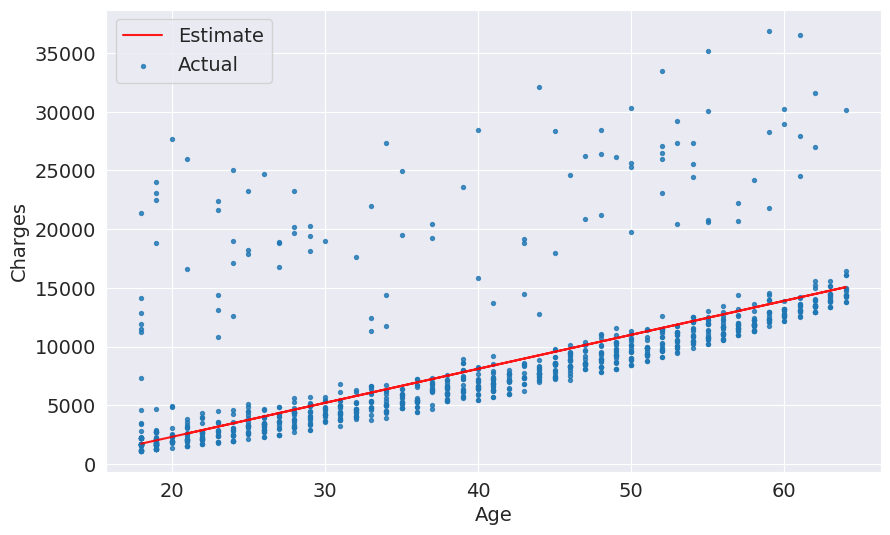

In [111]:
try_parameters(290,-3500)